In [1]:
# !pip install tf-explain

                                              0.0/43.6 kB ? eta -:--:--
     ------------------                       20.5/43.6 kB ? eta -:--:--
     ------------------                       20.5/43.6 kB ? eta -:--:--
     ------------------                       20.5/43.6 kB ? eta -:--:--
     -------------------------------------- 43.6/43.6 kB 213.6 kB/s eta 0:00:00


In [2]:
# !pip install opencv-python

                                              0.0/38.2 MB ? eta -:--:--
                                              0.5/38.2 MB 14.4 MB/s eta 0:00:03
     -                                        1.6/38.2 MB 20.2 MB/s eta 0:00:02
     --                                       2.0/38.2 MB 16.2 MB/s eta 0:00:03
     --                                       2.7/38.2 MB 16.8 MB/s eta 0:00:03
     ---                                      3.8/38.2 MB 18.7 MB/s eta 0:00:02
     ----                                     4.6/38.2 MB 18.2 MB/s eta 0:00:02
     -----                                    5.3/38.2 MB 18.7 MB/s eta 0:00:02
     ------                                   5.9/38.2 MB 18.0 MB/s eta 0:00:02
     ------                                   6.3/38.2 MB 16.8 MB/s eta 0:00:02
     -------                                  7.1/38.2 MB 16.8 MB/s eta 0:00:02
     --------                                 7.7/38.2 MB 16.4 MB/s eta 0:00:02
     --------                                 8.

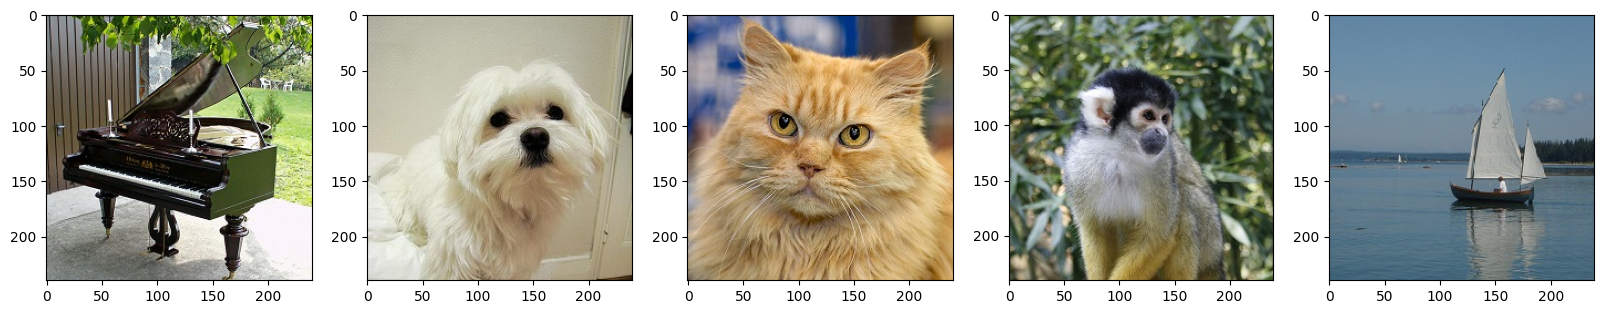

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16


# XAI알고리즘을 불러오는 부분입니다.
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity


import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# 원본 이미지가 들어갈 리스트 만들기
images_originals = []


# 원본 이미지가 저장된 폴더에서 하나씩 불러와 리스트에 넣기
for img_path in glob.glob('../data/img/*_0.jpg'):
    images_originals.append(mpimg.imread(img_path))


# 주피터 노트북 상에서 보여질 이미지의 크기
plt.figure(figsize=(20,20))


# 원본 이미지를 주피터 노트북에서 보이게 하기
for i, image_o in enumerate(images_originals):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_o)

553467096/553467096 [==============================] - 344s 1us/step


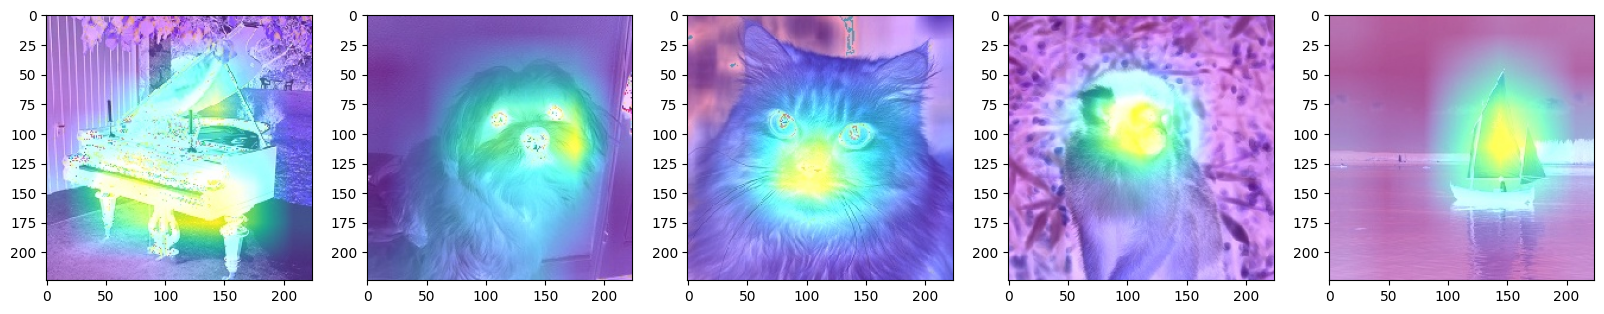

In [4]:
import tensorflow as tf
with tf.device('/CPU:0'):
    # 사전에 학습된 딥러닝 모델 불러오기
    model = VGG16(weights="imagenet", include_top=True)


    # 원본 이미지 이름과 Imagenet에서의 해당 이미지 인덱스
    input_list = ["maltese", "persian_cat", "squirrel_monkey", "grand_piano", "yawl"]
    imagenet_index = ["153", "283", "382", "579", "914"]


    # 그레이디언트 CAM 알고리즘 선택
    explainer = GradCAM()


    # 그레이디언트 CAM 알고리즘이 적용된 이미지가 들어갈 빈 리스트 만들기
    images_cams = []


    # 그레이디언트 CAM 알고리즘 실행
    for l, i in zip(input_list, imagenet_index):  
        img = load_img('../data/img/{}_0.jpg'.format(l), target_size=(224, 224)) # 이미지를 불러오고 내부에서 처리될 이미지의 크기를 설정합니다.
        img = img_to_array(img) # 이미지를 넘파이 배열로 바꾸어 줍니다.
        data = ([img], None)
        grid = explainer.explain(data, model, int(i))                 # 그레이디언트 CAM이 실행되는 부분입니다.
        explainer.save(grid, ".", '../data/img/{}_cam.jpg'.format(l)) # 실행 후 저장되는 이름입니다.


    # 그레이디언트 CAM 알고리즘이 적용된 이미지를 불러오는 부분의 시작입니다.
    plt.figure(figsize=(20,20))


    for img_path in glob.glob('../data/img/*_cam.jpg'):
        images_cams.append(mpimg.imread(img_path))


    for i, image_c in enumerate(images_cams):
        plt.subplot(5, 5, i + 1)
        plt.imshow(image_c)

2/2 [==============================] - 9s 1s/step


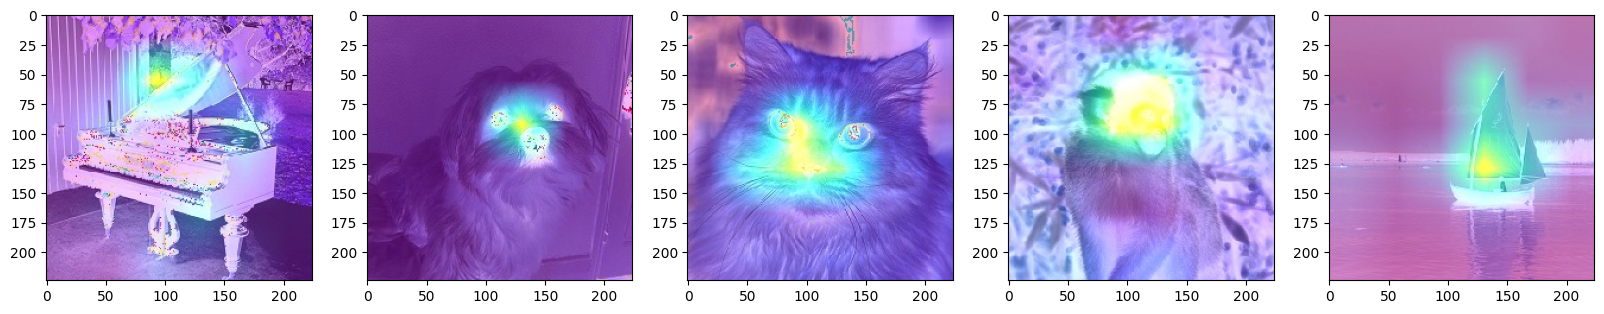

In [5]:
# 오클루전 알고리즘을 불러와 실행합니다.
with tf.device('/CPU:0'):
    explainer = OcclusionSensitivity()


    # 알고리즘이 적용된 이미지가 들어갈 빈 리스트 만들기
    images_occ1s = []


    # 패치 사이즈를 정합니다.
    patch_size = 40


    # 오클루전 알고리즘 실행
    for l, i in zip(input_list, imagenet_index):
        img = load_img('../data/img/{}_0.jpg'.format(l), target_size=(224, 224))
        img = img_to_array(img)
        data = ([img], None)
        grid = explainer.explain(data, model, int(i), patch_size) #패치 사이즈의 설정이 추가됩니다.
        explainer.save(grid, ".", '../data/img/{}_occ1.jpg'.format(l))


    # 오클루전 알고리즘이 적용된 이미지를 불러오는 부분의 시작입니다.
    plt.figure(figsize=(20,20))


    for img_path in glob.glob('../data/img/*_occ1.jpg'):
        images_occ1s.append(mpimg.imread(img_path))


    for i, image in enumerate(images_occ1s):
        plt.subplot(5, 5, i + 1)
        plt.imshow(image)


In [ ]:
from IPython.lib